In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

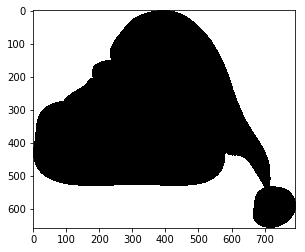

In [2]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
hat = cv2.imread('hat.png')

img_hat = cv2.cvtColor(hat,cv2.COLOR_BGR2GRAY)

ret,img_hat = cv2.threshold(img_hat,50,255,cv2.THRESH_BINARY)
hat_mask = img_hat
hat_mask_inv = cv2.bitwise_not(hat_mask)
plt.imshow(hat_mask,cmap=plt.cm.Greys_r)
plt.imshow(hat_mask_inv,cmap=plt.cm.Greys_r)

origHatHeight, origHatWidth = img_hat.shape[:2]

In [7]:
video_capture = cv2.VideoCapture(0)
while True:
        ret, frame = video_capture.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces_data = face_cascade.detectMultiScale(gray, 1.3, 5)
#creation des rectangles :        
        for (xNP, yNP, wNP, hNP) in faces_data:
            
            face = cv2.rectangle(frame,(xNP,yNP),(xNP+wNP,yNP+hNP),(255,0,0),2)
            #roi_color = frame[y:y+h, x:x-w]
            hatWidth = int(1.2*wNP)
            hatHeight = int(2/3*hNP)
            
            
            x = xNP.item()
            y = yNP.item()
            w = wNP.item()
            h = hNP.item()
            x1 = x + int(w/2) - int(hatWidth/2)
            y1 = y - hatHeight
            x2 = x + w - int(hatWidth/4)
            y2 = y
            
            # Check for clipping
            #if x1 < 0:
            #    x1 = 0
            #if y1 < 0:
            #    y1 = 0
            #if x2 > w:
            #    x2 = w
            #if y2 > h:
            #    y2 = h
                
            #print(x,y,w,h)  
            #hatHeight = int(h)
            #hatWidth = abs(x2-x1)
            
            
            mask = cv2.resize(hat_mask, (hatWidth,hatHeight), interpolation = cv2.INTER_AREA)
            mask_inv = cv2.resize(hat_mask_inv, (hatWidth,hatHeight), interpolation = cv2.INTER_AREA)
        
            
            
            roi = frame[y1:y2,x1:x2]
            Hatimg= cv2.resize(hat, (x2-x1,y2-y1), interpolation = cv2.INTER_AREA)
            roi_bg = cv2.bitwise_and(roi,roi,mask_inv)
            roi_fg = cv2.bitwise_and(Hatimg,Hatimg,mask)
            
            dst = cv2.add(roi_bg,roi_fg)
            frame[y1:y2,x1:x2] = dst
            break
            
#            cv2.rectangle(img=frame,
#                          pt1=(x, y),
#                          pt2=(x + w, y + h),
#                          color=(255, 0, 0),
#                          thickness=2)



            
            
#        face = frame[x:x+w,y:y+h,:]
#        print(face[:,:,:])        
#        face_gray = cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)
#        print(face_gray[:,:])
#        eyes_data = eye_cascade.detectMultiScale(face_gray,1.01,2)


#        for (x1,y1,w1,h1) in eyes_data:
#            cv2.rectangle(img=face,
#                          pt1=(x1,y1),
#                          pt2=(x1+w1,y1+h1),
#                          color=(0,255,0),
#                          thickness=2)

        # affichage
        cv2.imshow('Face Detection using a webcam ', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

video_capture.release()
cv2.destroyAllWindows()

In [6]:
video_capture.release()